In [2]:
#joyce muchema
# project implementation
import os
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import seaborn as sn
import openpyxl
import xlsxwriter
import csv
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.measure import label, regionprops, regionprops_table
from skimage.filters import threshold_otsu
from skimage.morphology import area_closing, area_opening
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [5]:
# Get the list of all files and directories
path = 'C://Users//301CE//Desktop//Skin_Data'
Disease_name = [] #stores the disease names
No_of_images =[] #stores the number of images
dir_path = [] # stores the path of the directories

def getAllFiles(path):
#     print(path)
#     print(len(os.listdir(path)))
    for root, dirs, files in os.walk(path):
        for dir_name in dirs:
            Disease_name.append(dir_name)
            dir_path.append((os.path.join(root,dir_name)))
            No_of_images.append(len(os.listdir(os.path.join(root,dir_name))))
getAllFiles(path)
# print(dir_path)         
df =pd.DataFrame({
    "Disease name":Disease_name,
    "No_of_images":No_of_images
    
})
df

,Disease name,No_of_images
0,Atopic Dermatitis,1257
1,Basal Cell Carcinoma (BCC),3323
2,Benign Keratosis-like Lesions (BKL),568
3,Eczema,997
4,Melanocytic Nevi (NV),1324
5,Melanoma,1301
6,Psoriasis pictures Lichen Planus,695
7,Seborrheic Keratoses,1094
8,Tinea Ringworm Candidiasis,1110
9,Warts Molluscum,959


In [ ]:
def get_attributes(name): 
    properties =[ 'area','convex_area','bbox_area','major_axis_length','minor_axis_length',
    'perimeter','equivalent_diameter', 'mean_intensity','solidity', 'eccentricity'] 
    dataframe = pd.DataFrame(columns=properties) 
#     for file in filepaths: 
    folder_path = 'C://Users//301CE//Desktop//Skin_Data//{}'.format(name)
    for root, dirs, files in os.walk(folder_path):
        for image_files in files:
            grayscale = rgb2gray(imread(os.path.join(root,image_files)))
            threshold = threshold_otsu(grayscale) 
            binarized = grayscale < threshold 
            closed = area_closing(binarized, 1000) 
            opened = area_opening(closed, 1000) 
            labeled = label(opened) 
            regions = regionprops(labeled) 
            data = pd.DataFrame(regionprops_table(labeled, grayscale, properties=properties))
            data = data[(data.index!=0) & (data.area>100)] 
            dataframe = pd.concat([dataframe, data]) 
        return dataframe


Atopic_Dermatitis = get_attributes('Atopic Dermatitis')
Atopic_Dermatitis['class'] = 'Atopic Dermatitis'

Basal_Cell_Carcinoma = get_attributes('Basal Cell Carcinoma (BCC)')
Basal_Cell_Carcinoma['class']= 'Basal Cell Carcinoma (BCC)'   

Benign_Keratosis_like_Lesions =get_attributes('Benign Keratosis-like Lesions (BKL)')
Benign_Keratosis_like_Lesions['class'] = 'Benign Keratosis-like Lesions (BKL)'

Eczema = get_attributes('Eczema')
Eczema['class']='Eczema'

Melanocytic_Nevi= get_attributes('Melanocytic Nevi (NV)')
Melanocytic_Nevi ['class']= 'Melanocytic Nevi (NV)'

Melanoma=get_attributes('Melanoma')
Melanoma ['class']= 'Melanoma'

Psoriasis_pictures_Lichen_Planus=get_attributes('Psoriasis pictures Lichen Planus')
Psoriasis_pictures_Lichen_Planus ['class'] = 'Psoriasis pictures Lichen Planus'

Seborrheic_Keratoses =get_attributes('Seborrheic Keratoses')
Seborrheic_Keratoses ['class'] = 'Seborrheic Keratoses'


Tinea_Ringworm_Candidiasis= get_attributes('Tinea Ringworm Candidiasis')
Tinea_Ringworm_Candidiasis ['class']= 'Tinea Ringworm Candidiasis'

Warts_Molluscum = get_attributes('Warts Molluscum')
Warts_Molluscum ['class']= 'Warts Molluscum'


#combining all the dataframe into one file
dfinal = pd.concat([Atopic_Dermatitis,Basal_Cell_Carcinoma,Benign_Keratosis_like_Lesions,
              Eczema,Melanocytic_Nevi,Melanoma,Psoriasis_pictures_Lichen_Planus,
               Seborrheic_Keratoses ,Tinea_Ringworm_Candidiasis,Warts_Molluscum])
  
#converting the final datafraame to an excel file

dfinal.to_csv("attributes.csv") 







# # print(image_files)

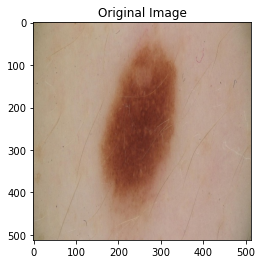

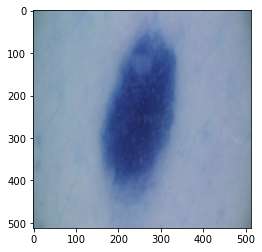

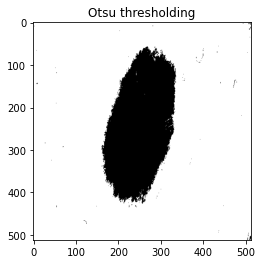

In [8]:
#this cell is used to show what is happeing in function get_attributes


#function for loading a single image
def loadImage(pic):
    img = mpimg.imread(pic)
    plt.imshow(img)
    plt.title("Original Image")
    plt.show()
    return img

loadImage('C://Users//301CE//Desktop//Skin_Data//Melanoma//ISIC_6653456.jpg')

def medianFilter(pic):
    img = cv2.imread(pic)
    img_median = cv2.medianBlur(img, 5) # Add median filter to image      
    plt.imshow(img_median)
    plt.show()
        
medianFilter('C://Users//301CE//Desktop//Skin_Data//Melanoma//ISIC_6653456.jpg')  
img = cv2.imread('C://Users//301CE//Desktop//Skin_Data//Melanoma//ISIC_6653456.jpg',0)
ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding')
plt.show()









In [5]:
# loading the datafile to find missing values
df = pd.read_csv('attributes.csv')
display(df)
display(df.isnull())
 
    
    

,area,convex_area,bbox_area,major_axis_length,minor_axis_length,perimeter,equivalent_diameter,mean_intensity,solidity,eccentricity,class
0,12726,17847,31302,249.452522,90.225547,742.670094,127.291973,0.251912,0.713061,0.932297,Atopic Dermatitis
1,1825,3938,7650,136.400843,30.421743,398.728968,48.204379,0.286604,0.463433,0.974811,Atopic Dermatitis
2,1636,3644,6258,138.753188,32.726664,376.936075,45.640113,0.266994,0.448957,0.971786,Atopic Dermatitis
3,24103,32573,43512,250.931380,166.038683,1647.750396,175.182456,0.442291,0.739969,0.749778,Atopic Dermatitis
4,4451,6163,6960,204.979704,36.478007,559.320851,75.280736,0.406273,0.722213,0.984038,Atopic Dermatitis
...,...,...,...,...,...,...,...,...,...,...,...
26474,1046,1578,2223,55.259350,33.537532,265.195960,36.493952,0.411080,0.662864,0.794769,Warts Molluscum
26475,9915,12657,17290,142.757406,103.520845,967.386868,112.357332,0.341823,0.783361,0.688589,Warts Molluscum
26476,9915,12657,17290,142.757406,103.520845,967.386868,112.357332,0.341823,0.783361,0.688589,Warts Molluscum
26477,1086,1192,1708,57.021174,24.643735,160.403066,37.185187,0.204783,0.911074,0.901785,Warts Molluscum


,area,convex_area,bbox_area,major_axis_length,minor_axis_length,perimeter,equivalent_diameter,mean_intensity,solidity,eccentricity,class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
26474,False,False,False,False,False,False,False,False,False,False,False
26475,False,False,False,False,False,False,False,False,False,False,False
26476,False,False,False,False,False,False,False,False,False,False,False
26477,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#spliting and training the dataset
from sklearn.svm import SVC

df = pd.read_csv('attributes.csv')

# input and outputs
X= df.drop('class', axis = 1)
y = df['class']

# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size=0.2,random_state=1)

#used linear kernel to get the best accuracy

classifier1 = SVC(kernel='linear')

classifier1.fit(X_train,y_train)












In [ ]:
# testing the model
y_pred = classifier1.predict(X_test)


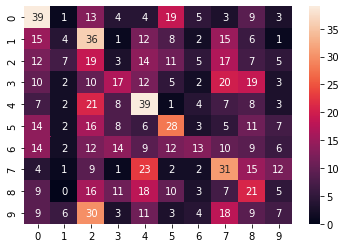

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred, labels=classifier1.classes_)

sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

In [39]:
from sklearn.metrics import cohen_kappa_score

cohen_score = cohen_kappa_score(y_test, y_pred)

print(cohen_score)

0.13092415879218244


In [42]:
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))

                                     precision    recall  f1-score   support

                  Atopic Dermatitis       0.29      0.39      0.33       100
         Basal Cell Carcinoma (BCC)       0.15      0.04      0.06       100
Benign Keratosis-like Lesions (BKL)       0.10      0.19      0.13       100
                             Eczema       0.24      0.17      0.20       100
              Melanocytic Nevi (NV)       0.26      0.39      0.31       100
                           Melanoma       0.28      0.28      0.28       100
   Psoriasis pictures Lichen Planus       0.30      0.13      0.18       101
               Seborrheic Keratoses       0.23      0.31      0.27       100
         Tinea Ringworm Candidiasis       0.18      0.21      0.20       100
                    Warts Molluscum       0.13      0.07      0.09       100

                           accuracy                           0.22      1001
                          macro avg       0.22      0.22      0.21      10